In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.sparse import csr_matrix
from scipy.stats import mannwhitneyu

# *NOTES
Methylation data has been pre-processed and standardized (Esteban-Cantos et al., 2023)

# 1. Hierarchical clustering of methylation levels in HIV 

## Infection
HIV- vs HIV+/pre-ART

In [41]:
# Load DNA methylation data as a pandas DataFrame
methylation_data = pd.read_csv('Data/methylation_values.csv', index_col=0)
methylation_data_infection = methylation_data.drop('β-value_HIV+ post-ART', axis=1)
cpg_ids = methylation_data_infection.pop('CpG_ID')

# Drop CpG_IDs with NaN (NOTE: there should be none)
methylation_data_infection.dropna(inplace=True)

# Saving to csv
methylation_data_infection.to_csv('Data/methylation_data_infection.csv')
methylation_data_infection

,β-value_HIV+ pre-ART,β-value_HIV-
0,0.249471,0.646568
1,0.228869,0.555820
2,0.192531,0.502621
3,0.195581,0.500863
4,0.177005,0.451498
...,...,...
425,0.333899,0.184099
426,0.304944,0.152206
427,0.304728,0.146675
428,0.263290,0.104750


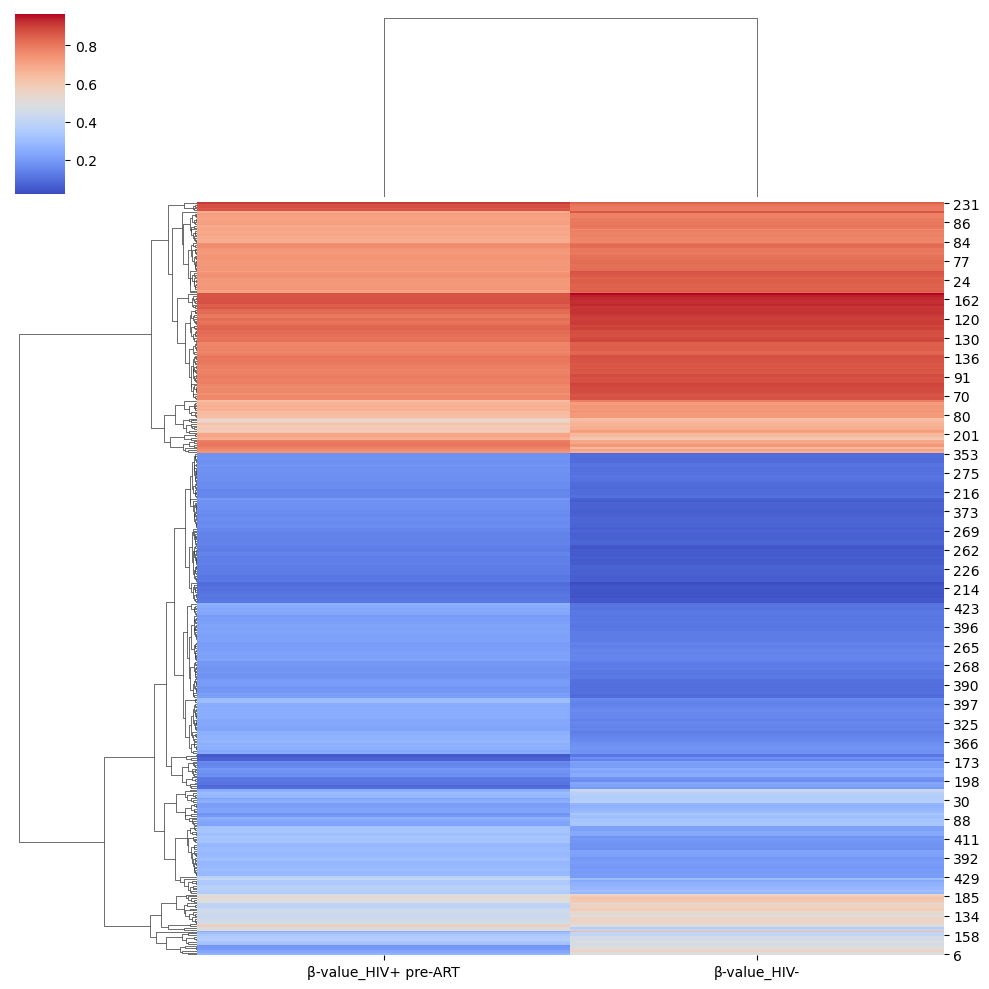

In [42]:
# Generate a clustermap 
sns.clustermap(methylation_data_infection, cmap='coolwarm')

# Display the heatmap
plt.show()

In [1]:
# Choosing the optimal number of clusters using k-means and calculating within-cluster sum of squares for each number 
# of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(methylation_data_infection)
    inertias.append(kmeans.inertia_)

# Plot the number of clusters against the within-cluster sum of squares
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method: Infection')
plt.show()

NameError: name 'KMeans' is not defined

In [44]:
# Silhouette coefficient using optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100)
kmeans.fit(methylation_data_infection)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

silhouette_avg = silhouette_score(methylation_data_infection, labels)
print("The average silhouette coefficient is :", silhouette_avg)

The average silhouette coefficient is : 0.7727093181618679


The average silhouette coefficient is : 0.761871989359495


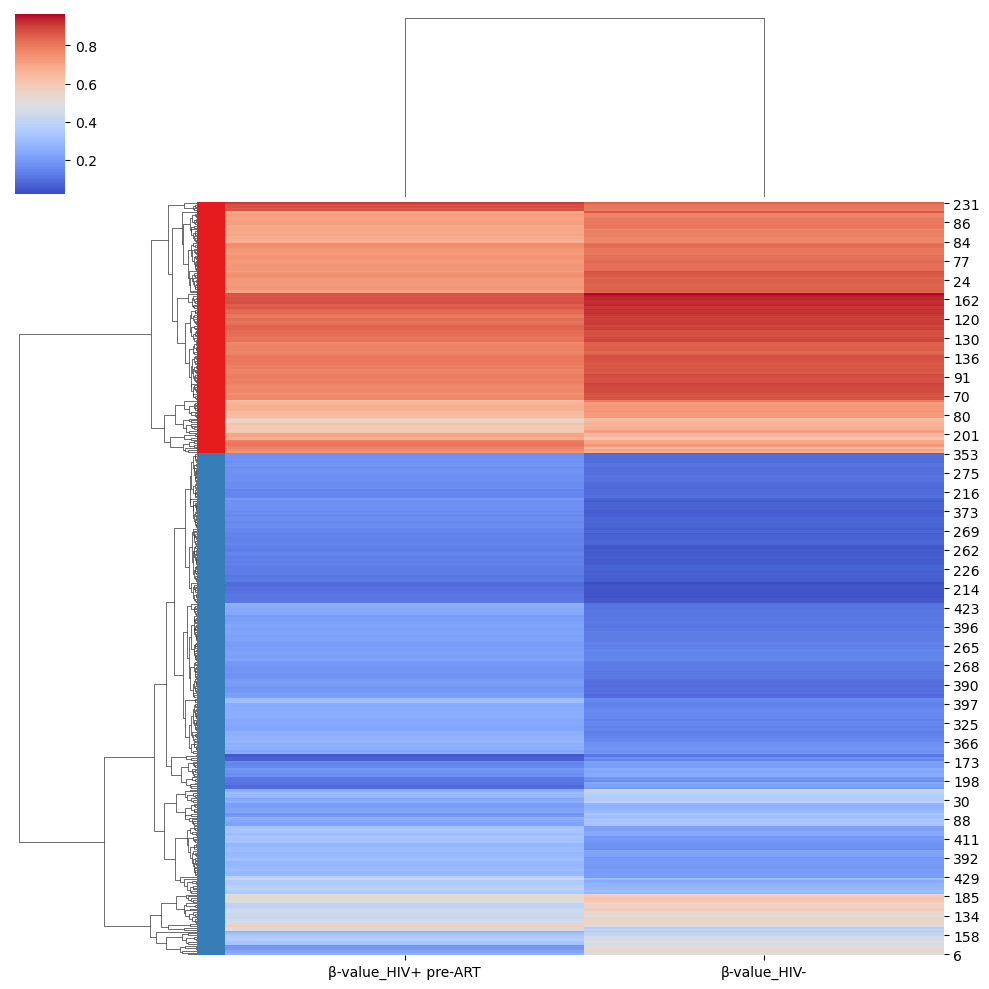

In [45]:
# Clustering by methylation level
# Calculating linkage matrix
linkages = linkage(methylation_data_infection, method='average') # Computing linkage matrix using average method

k = 2 # Number of clusters
clusters = fcluster(linkages, k, criterion='maxclust') # Assigns observations to at most k clusters
colors = sns.color_palette("Set1", n_colors=k)
row_colors = [colors[label - 1] for label in clusters] # Red (cluster 1) is hyper, blue (cluster 2) is hypo

sns.clustermap(methylation_data_infection, row_colors=row_colors, cmap='coolwarm') 

silhouette_avg = silhouette_score(methylation_data_infection, clusters)
print("The average silhouette coefficient is :", silhouette_avg)

In [46]:
# Extracting CpG_IDs for each methylation level cluster
cpg_ids = np.array(cpg_ids)
infection_clusters = np.array(clusters)
hyper = []
hypo = []

for i, cluster in enumerate(infection_clusters):
    if cluster == 1:
        hyper.append(cpg_ids[i])
    else:
        hypo.append(cpg_ids[i])
        
# Saving to csv files 
infection_cpgs_high = pd.DataFrame(hyper, columns=['CpG_ID'])
infection_cpgs_high.to_csv('Data/infection_cpgs_high.csv')
infection_cpgs_low = pd.DataFrame(hypo, columns=['CpG_ID'])
infection_cpgs_low.to_csv('Data/infection_cpgs_low.csv')

## Treatment
HIV+/pre-ART vs HIV+/post-ART

In [51]:
# Load DNA methylation data as a pandas DataFrame
methylation_data = pd.read_csv('Data/treatment_df.csv', index_col=0)
methylation_data_treatment = methylation_data.drop('Δβ-value_HIV+ pre-ART vs. HIV+ post-ART', axis=1)
cpg_ids = methylation_data_treatment.pop('CpG_ID')

# Drop CpG_IDs with NaN (NOTE: there should be none)
methylation_data_treatment.dropna(inplace=True)

# Saving to csv
methylation_data_treatment.to_csv('Data/methylation_data_treatment.csv')
methylation_data_treatment

,β-value_HIV+ pre-ART,β-value_HIV+ post-ART
0,0.391345,0.704354
1,0.322713,0.611234
2,0.249471,0.522651
3,0.342461,0.595107
4,0.286796,0.508171
...,...,...
840,0.525928,0.431976
841,0.381706,0.286123
842,0.238024,0.140848
843,0.306036,0.204681


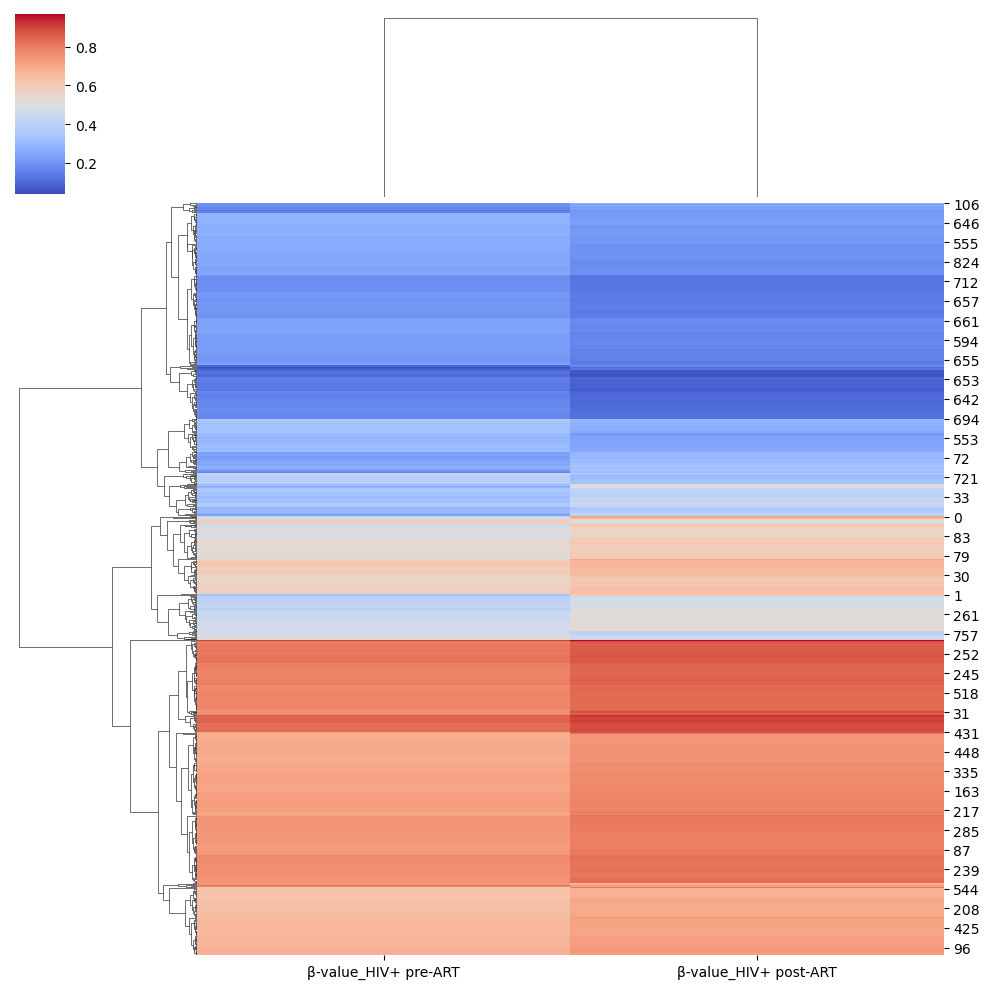

In [52]:
# Generate a clustermap 
sns.clustermap(methylation_data_treatment, cmap='coolwarm')

# Display the heatmap
plt.show()

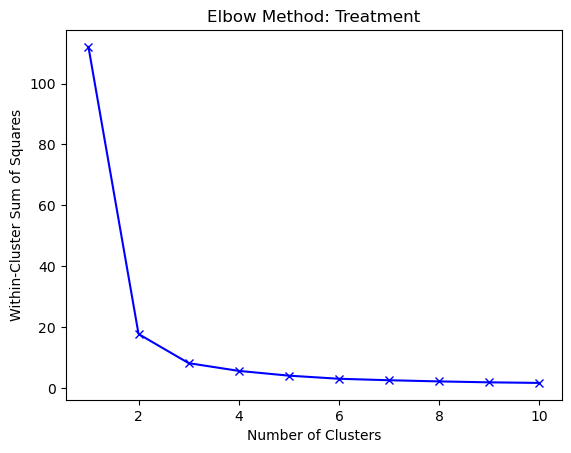

In [53]:
# Choosing the optimal number of clusters using k-means and calculating within-cluster sum of squares for each number 
# of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(methylation_data_treatment)
    inertias.append(kmeans.inertia_)

# Plot the number of clusters against the within-cluster sum of squares
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method: Treatment')
plt.show()

In [54]:
# Silhouette coefficient using optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100)
kmeans.fit(methylation_data_treatment)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

silhouette_avg = silhouette_score(methylation_data_treatment, labels)
print("The average silhouette coefficient is :", silhouette_avg)

The average silhouette coefficient is : 0.7237875876936595


The average silhouette coefficient is : 0.714412209222963


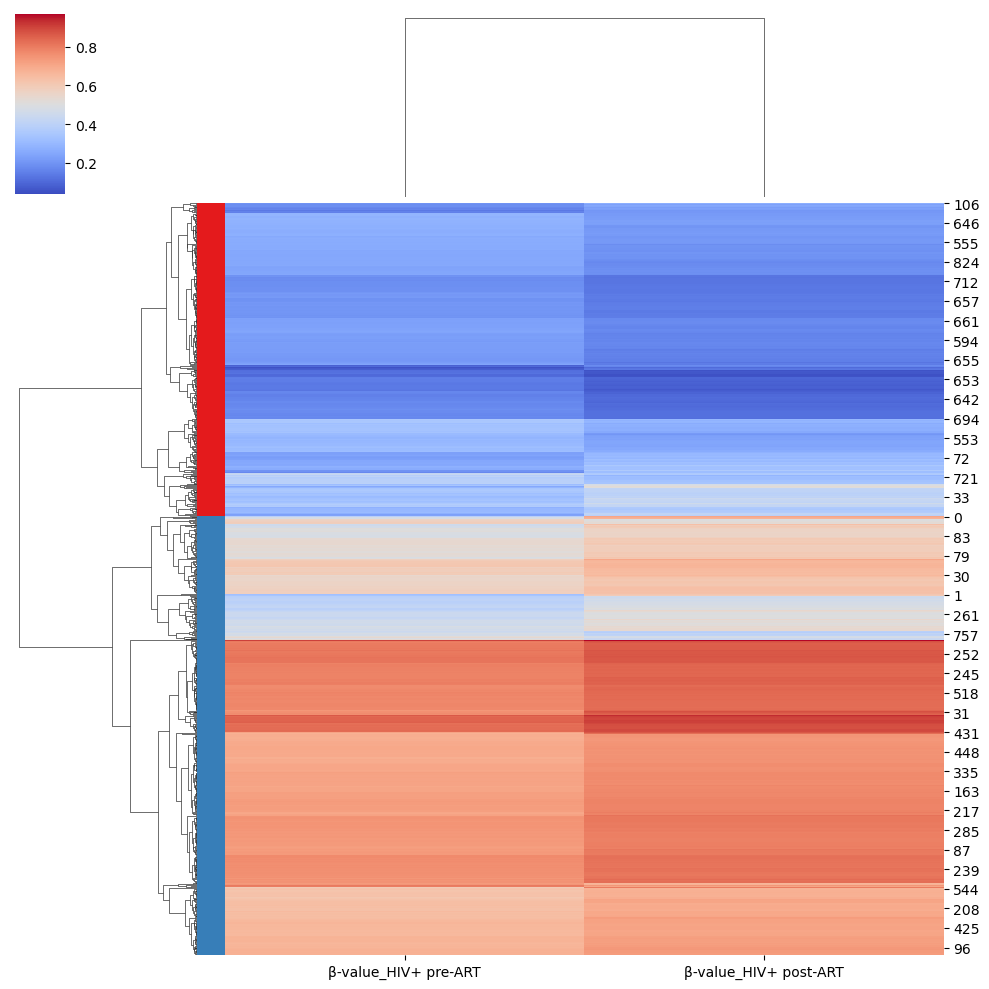

In [55]:
# Clustering by methylation level
# Calculating linkage matrix
linkages = linkage(methylation_data_treatment, method='average') # Computing linkage matrix using average method

k = 2 # Number of clusters
clusters = fcluster(linkages, k, criterion='maxclust') # Assigns observations to at most k clusters
colors = sns.color_palette("Set1", n_colors=k)
row_colors = [colors[label - 1] for label in clusters] # So red (cluster 1) is hypo, blue (cluster 2) is hyper

sns.clustermap(methylation_data_treatment, row_colors=row_colors, cmap='coolwarm') 

silhouette_avg = silhouette_score(methylation_data_treatment, clusters)
print("The average silhouette coefficient is :", silhouette_avg)

In [56]:
# Extracting CpG_IDs for each methylation level cluster
cpg_ids = np.array(cpg_ids)
treatment_clusters = np.array(clusters)
hyper = []
hypo = []

for i, cluster in enumerate(treatment_clusters):
    if cluster == 1:
        hypo.append(cpg_ids[i])
    else:
        hyper.append(cpg_ids[i])
        
# Saving to csv files 
treatment_cpgs_high = pd.DataFrame(hyper, columns=['CpG_ID'])
treatment_cpgs_high.to_csv('Data/treatment_cpgs_high.csv')
treatment_cpgs_low = pd.DataFrame(hypo, columns=['CpG_ID'])
treatment_cpgs_low.to_csv('Data/treatment_cpgs_low.csv')

## Restoration

HIV- vs. HIV+ post-ART

In [34]:
# Load DNA methylation data as a pandas DataFrame
methylation_data = pd.read_csv('Data/df_group3_resampled.csv', index_col=0)
methylation_data_restoration = methylation_data.drop(['Δβ-value_HIV+ post-ART vs. HIV-','GB','CHR','MAPINFO'], axis=1)
cpg_ids = methylation_data_restoration.pop('CpG_ID')

# Drop CpG_IDs with NaN (NOTE: there should be none)
methylation_data_restoration.dropna(inplace=True)

# Saving to csv
methylation_data_restoration.to_csv('Data/methylation_data_restoration.csv')
methylation_data_restoration

,β-value_HIV+ post-ART,β-value_HIV-
0,0.766463,0.861797
1,0.119347,0.199028
2,0.788112,0.850419
3,0.826550,0.884531
4,0.795434,0.852940
...,...,...
310,0.125772,0.069989
311,0.796055,0.737848
312,0.125772,0.069989
313,0.125772,0.069989


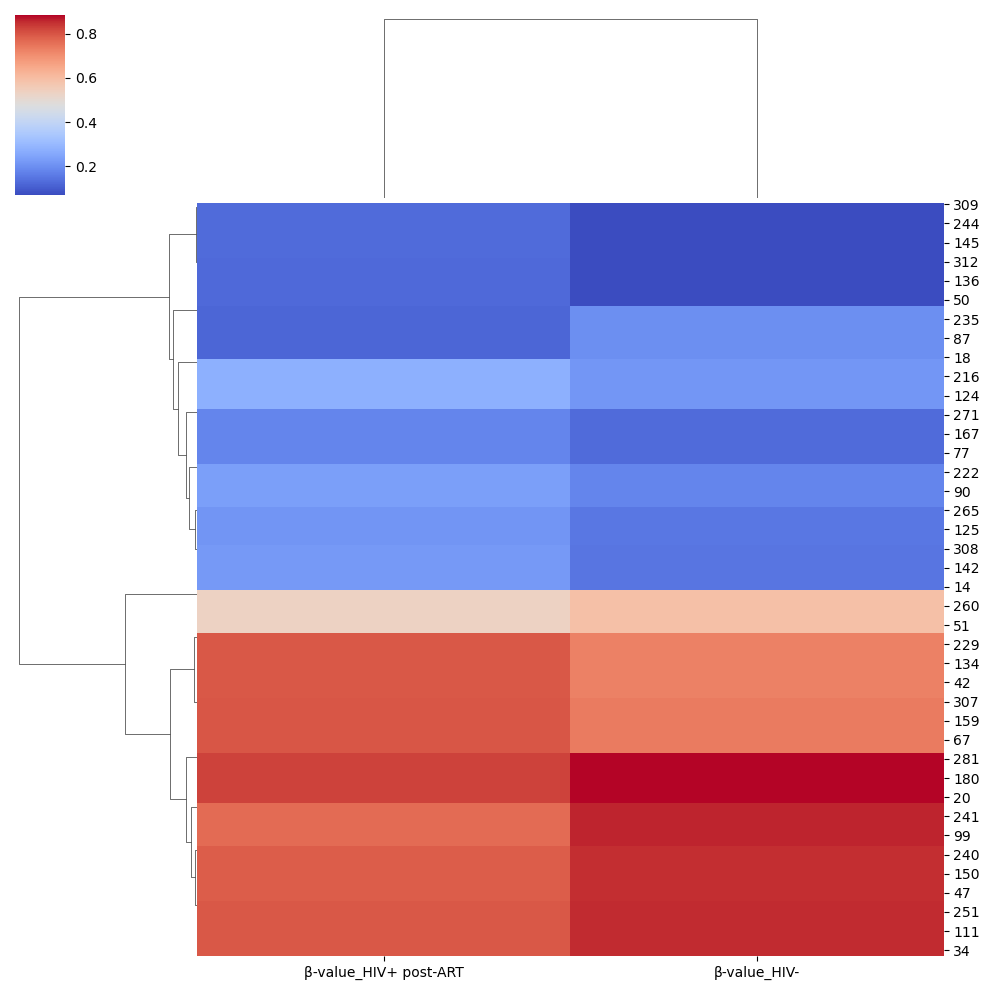

In [35]:
# Generate a clustermap 
sns.clustermap(methylation_data_restoration, cmap='coolwarm')

# Display the heatmap
plt.show()

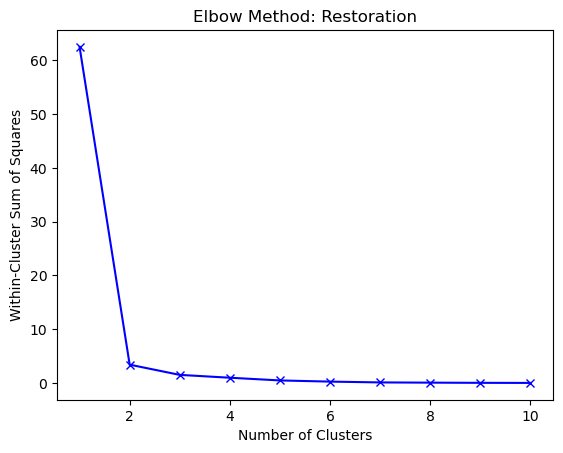

In [36]:
# Choosing the optimal number of clusters using k-means and calculating within-cluster sum of squares for each number 
# of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(methylation_data_restoration)
    inertias.append(kmeans.inertia_)

# Plot the number of clusters against the within-cluster sum of squares
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method: Restoration')
plt.show()

In [37]:
# Silhouette coefficient using optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100)
kmeans.fit(methylation_data_restoration)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

silhouette_avg = silhouette_score(methylation_data_restoration, labels)
print("The average silhouette coefficient is :", silhouette_avg)

The average silhouette coefficient is : 0.8648128050811239


The average silhouette coefficient is : 0.8648128050811239


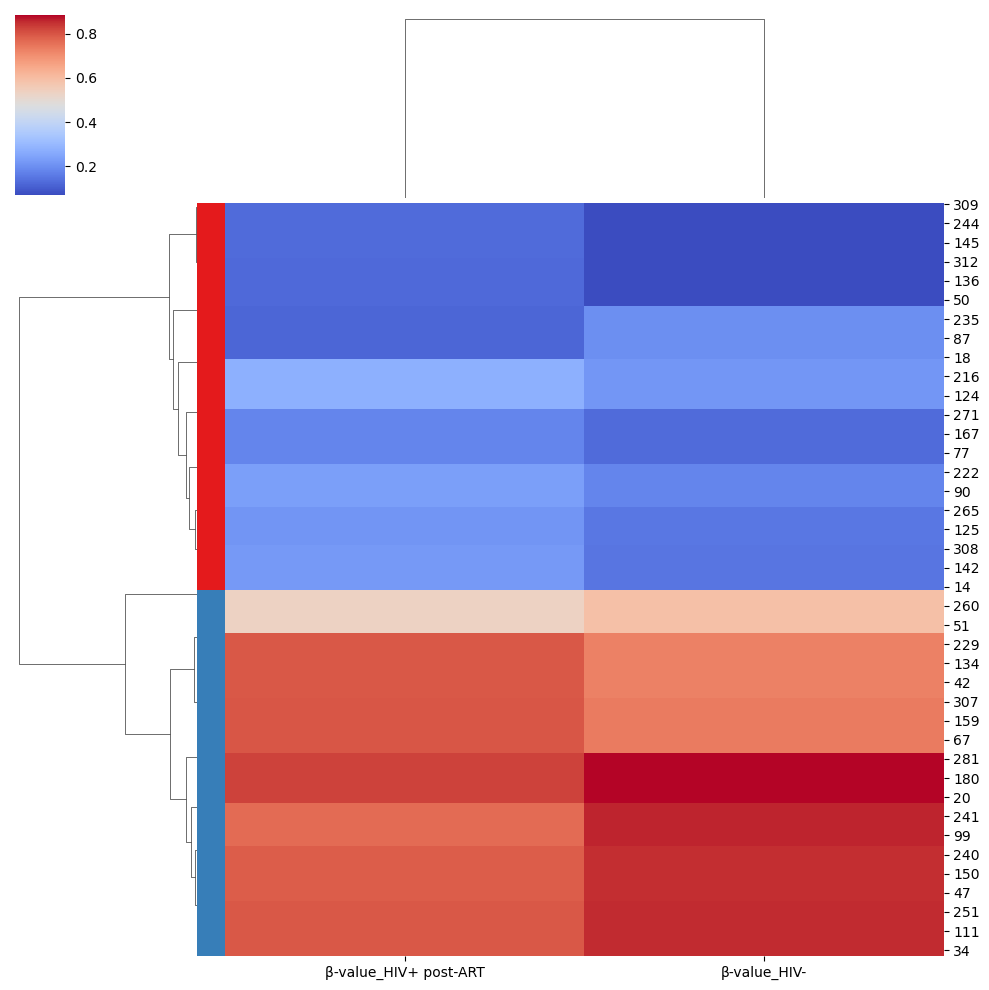

In [38]:
# Clustering by methylation level
# Calculating linkage matrix
linkages = linkage(methylation_data_restoration, method='average') # Computing linkage matrix using average method

k = 2 # Number of clusters
clusters = fcluster(linkages, k, criterion='maxclust') # Assigns observations to at most k clusters
colors = sns.color_palette("Set1", n_colors=k)
row_colors = [colors[label - 1] for label in clusters] # So red (cluster 1) is hyper, blue (cluster 2) is hypo

sns.clustermap(methylation_data_restoration, row_colors=row_colors, cmap='coolwarm') 

silhouette_avg = silhouette_score(methylation_data_restoration, clusters)
print("The average silhouette coefficient is :", silhouette_avg)

In [33]:
# Extracting CpG_IDs for each methylation level cluster
cpg_ids = np.array(cpg_ids)
restoration_clusters = np.array(clusters)
hyper = []
hypo = []

for i, cluster in enumerate(restoration_clusters):
    if cluster == 1:
        hypo.append(cpg_ids[i])
    else:
        hyper.append(cpg_ids[i])
        
# Saving to csv files 
restoration_cpgs_high = pd.DataFrame(hyper, columns=['CpG_ID'])
restoration_cpgs_high.to_csv('Data/restoration_cpgs_high.csv')
restoration_cpgs_low = pd.DataFrame(hypo, columns=['CpG_ID'])
restoration_cpgs_low.to_csv('Data/restoration_cpgs_low.csv')

# 2. Violin plots depicting mean methylation levels

## Infection

Text(0.5, 0, 'Infection')

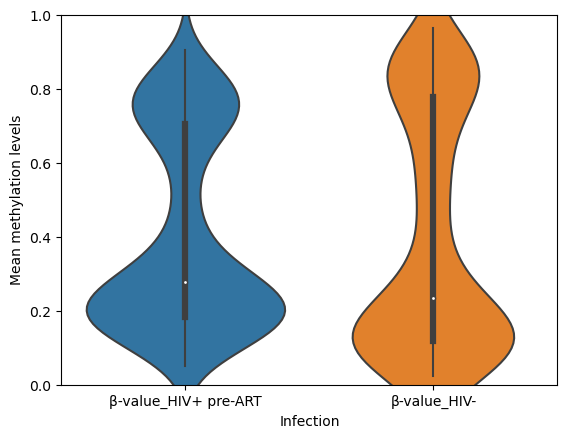

In [92]:
ax = sns.violinplot(data=methylation_data_infection, kde=True)
ax.set_ylim(0, 1)
plt.ylabel('Mean methylation levels')
plt.xlabel('Infection')

## Treatment

Text(0.5, 0, 'Treatment')

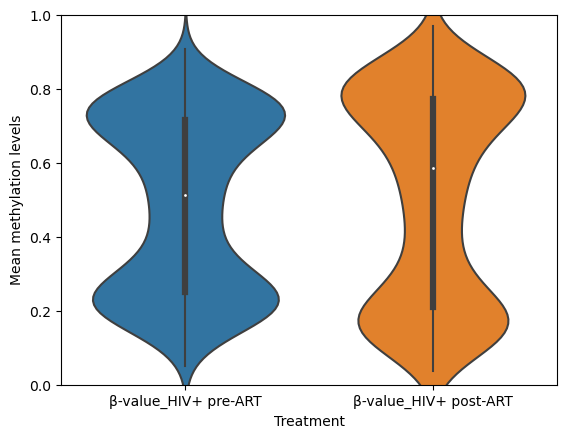

In [91]:
ax = sns.violinplot(data=methylation_data_treatment, kde=True)
ax.set_ylim(0, 1)
plt.ylabel('Mean methylation levels')
plt.xlabel('Treatment')

## Restoration

Text(0.5, 0, 'Restoration')

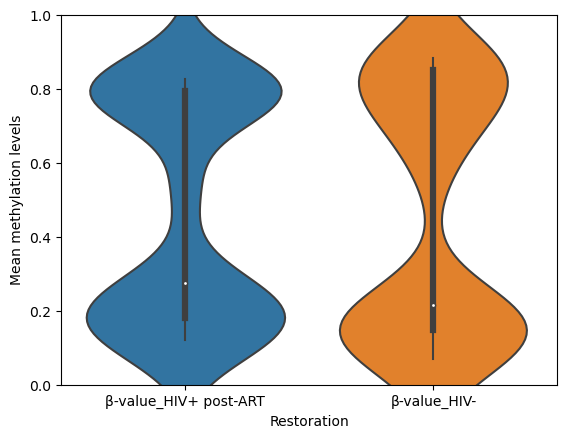

In [27]:
ax = sns.violinplot(data=methylation_data_restoration, kde=True)
ax.set_ylim(0, 1)
plt.ylabel('Mean methylation levels')
plt.xlabel('Restoration')

# 3. Methylation levels of CpG clusters

Goal: Trying to characterize the two identified CpG clusters. Are they high vs low methylation level groups? Are they large vs small delta methylation level groups post infection/treatment?

## Infection

In [47]:
## Complete infection dataframe
# Change in methylation levels after infection
methylation_data_infection['Δβ-value_HIV+ pre-ART vs. HIV-'] = methylation_data_infection['β-value_HIV+ pre-ART'] 
                                                                - methylation_data_infection['β-value_HIV-']
# Mean methylation levels
methylation_data_infection['Mean β-value'] = methylation_data_infection[['β-value_HIV+ pre-ART',
                                                                         'β-value_HIV-']].mean(axis=1)
# CpG cluster associated with each CpG site
methylation_data_infection['CpG_cluster'] = infection_clusters
cluster_dict = {1: 'high', 2: 'low'}
methylation_data_infection['CpG_cluster'] = methylation_data_infection['CpG_cluster'].map(cluster_dict)

methylation_data_infection

,β-value_HIV+ pre-ART,β-value_HIV-,Δβ-value_HIV+ pre-ART vs. HIV-,Mean β-value,CpG_cluster
0,0.249471,0.646568,-0.397097,0.448019,low
1,0.228869,0.555820,-0.326952,0.392344,low
2,0.192531,0.502621,-0.310090,0.347576,low
3,0.195581,0.500863,-0.305281,0.348222,low
4,0.177005,0.451498,-0.274493,0.314252,low
...,...,...,...,...,...
425,0.333899,0.184099,0.149800,0.258999,low
426,0.304944,0.152206,0.152738,0.228575,low
427,0.304728,0.146675,0.158052,0.225702,low
428,0.263290,0.104750,0.158540,0.184020,low


In [64]:
# Separating into two dataframes, one for each DMP cluster
methylation_data_infection_high = methylation_data_infection[methylation_data_infection['CpG_cluster'] == 'high']
methylation_data_infection_low = methylation_data_infection[methylation_data_infection['CpG_cluster'] == 'low']

# Saving to csv
methylation_data_infection_high.to_csv('Data/methylation_data_infection_high.csv')
methylation_data_infection_low.to_csv('Data/methylation_data_infection_low.csv')

Text(0.5, 0, 'Infection')

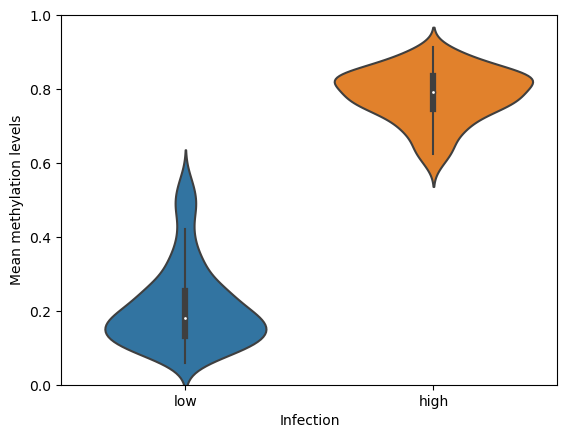

In [65]:
# Violin plot for each of the 2 CpG clusters using the mean β-value
ax = sns.violinplot(data=methylation_data_infection, x='CpG_cluster', y='Mean β-value') 
ax.set_ylim(0, 1)
plt.ylabel('Mean methylation levels')
plt.xlabel('Infection')

In [137]:
# Mann-Whitney U test
# Separate the data into two groups by CpG cluster
low = methylation_data_infection[methylation_data_infection['CpG_cluster'] == 'low']['Mean β-value']
high = methylation_data_infection[methylation_data_infection['CpG_cluster'] == 'high']['Mean β-value']

statistic, p_value = mannwhitneyu(low, high)
print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 0.0
p-value: 4.4001849444641924e-64


Text(0.5, 0, 'Infection')

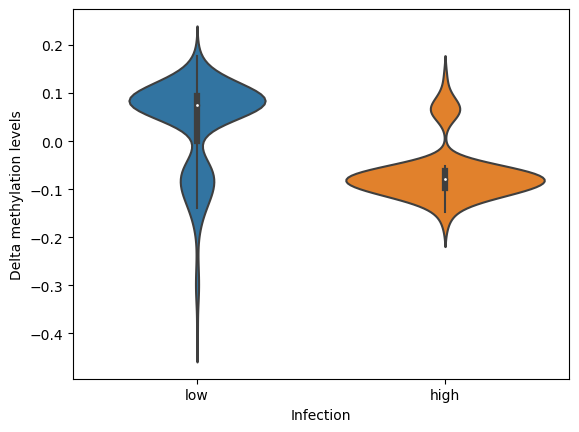

In [66]:
# Violin plot for each of the 2 CpG clusters using the Δβ-value
ax = sns.violinplot(data=methylation_data_infection, x='CpG_cluster', y='Δβ-value_HIV+ pre-ART vs. HIV-') 
plt.ylabel('Delta methylation levels')
plt.xlabel('Infection')

Thus, CpG clusters can broadly be categorized as group (1) high average methylation level and increase in mean methylation vs (2) low methylation level and decrease in mean methylation.

## Treatment

In [61]:
## Complete infection dataframe
# Change in methylation levels after infection
methylation_data_treatment['Δβ-value_HIV+ pre-ART vs. HIV+ post-ART'] 
= methylation_data_treatment['β-value_HIV+ pre-ART'] - methylation_data_treatment['β-value_HIV+ post-ART']
# Mean methylation levels
methylation_data_treatment['Mean β-value'] = methylation_data_treatment[['β-value_HIV+ pre-ART',
                                                                         'β-value_HIV+ post-ART']].mean(axis=1)
# CpG cluster associated with each CpG site
methylation_data_treatment['CpG_cluster'] = treatment_clusters
cluster_dict = {1: 'low', 2: 'high'}
methylation_data_treatment['CpG_cluster'] = methylation_data_treatment['CpG_cluster'].map(cluster_dict)

methylation_data_treatment

,β-value_HIV+ pre-ART,β-value_HIV+ post-ART,Δβ-value_HIV+ pre-ART vs. HIV+ post-ART,Mean β-value,CpG_cluster
0,0.391345,0.704354,-0.313009,0.547849,high
1,0.322713,0.611234,-0.288521,0.466973,high
2,0.249471,0.522651,-0.273180,0.386061,low
3,0.342461,0.595107,-0.252646,0.468784,high
4,0.286796,0.508171,-0.221375,0.397484,low
...,...,...,...,...,...
840,0.525928,0.431976,0.093952,0.478952,high
841,0.381706,0.286123,0.095583,0.333915,low
842,0.238024,0.140848,0.097175,0.189436,low
843,0.306036,0.204681,0.101355,0.255359,low


In [62]:
# Separating into two dataframes each for DMP cluster
methylation_data_treatment_high = methylation_data_treatment[methylation_data_treatment['CpG_cluster'] == 'high']
methylation_data_treatment_low = methylation_data_treatment[methylation_data_treatment['CpG_cluster'] == 'low']

methylation_data_treatment_high.to_csv('Data/methylation_data_treatment_high.csv')
methylation_data_treatment_low.to_csv('Data/methylation_data_treatment_low.csv')

Text(0.5, 0, 'Treatment')

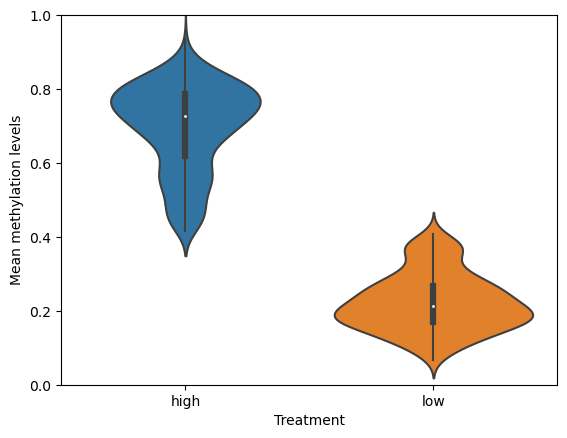

In [63]:
# Violin plot for each of the 2 CpG clusters 
ax = sns.violinplot(data=methylation_data_treatment, x='CpG_cluster', y='Mean β-value') # Well what is y?
ax.set_ylim(0, 1)
plt.ylabel('Mean methylation levels')
plt.xlabel('Treatment')

In [138]:
# Mann-Whitney U test
# Separate the data into two groups
low = methylation_data_treatment[methylation_data_treatment['CpG_cluster'] == 'low']['Mean β-value']
high = methylation_data_treatment[methylation_data_treatment['CpG_cluster'] == 'high']['Mean β-value']

statistic, p_value = mannwhitneyu(low, high)
print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 2.0
p-value: 7.712650325365116e-136


Text(0.5, 0, 'Treatment')

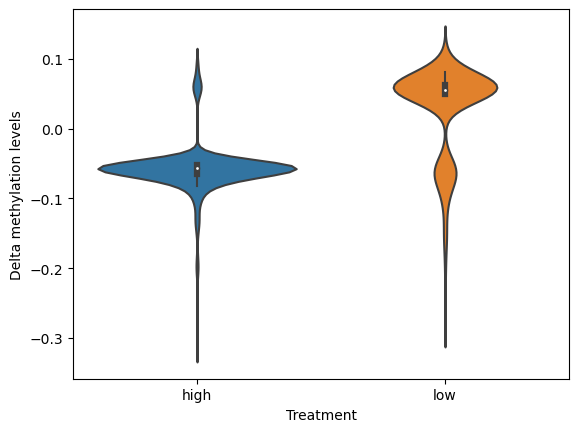

In [67]:
# Violin plot for each of the 2 CpG clusters using the Δβ-value
ax = sns.violinplot(data=methylation_data_treatment, x='CpG_cluster', y='Δβ-value_HIV+ pre-ART vs. HIV+ post-ART') 
plt.ylabel('Delta methylation levels')
plt.xlabel('Treatment')

Thus, CpG clusters can broadly be categorized as group (1) high average methylation level and decrease in mean methylation vs (2) low methylation level and increase in mean methylation.